** 1. import libraries **

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,4
import seaborn as sns

** 2. import dataset **

In [2]:
df = pd.read_csv('used cars.csv')
df.head()

,Brand,Price,Mileage,EngineV,Year
0,Mercedes-Benz,222000.0,1,6.3,2016
1,Mercedes-Benz,177000.0,1,5.5,2016
2,Mercedes-Benz,177777.0,1,5.5,2016
3,Mercedes-Benz,199999.0,1,5.5,2016
4,Mercedes-Benz,199999.0,1,5.5,2016


** 3. dummies **

In [3]:
df['log Price'] = np.log(df['Price'])
df['log Mileage'] = np.log(df['Mileage'])
df.drop(['Price','Mileage'], axis=1, inplace=True)
df = pd.get_dummies(df)
df.head()

,EngineV,Year,log Price,log Mileage,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,6.3,2016,12.310433,0.0,0,0,1,0,0,0,0
1,5.5,2016,12.083905,0.0,0,0,1,0,0,0,0
2,5.5,2016,12.088285,0.0,0,0,1,0,0,0,0
3,5.5,2016,12.206068,0.0,0,0,1,0,0,0,0
4,5.5,2016,12.206068,0.0,0,0,1,0,0,0,0


** 4. scatter plot ** 

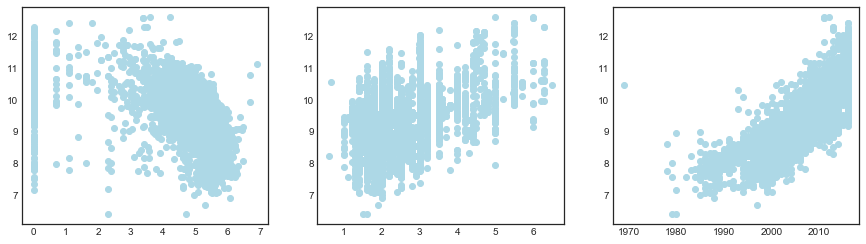

In [4]:
fig, axs = plt.subplots(1,3)
axs[0].scatter(df['log Mileage'], df['log Price'], color='lightblue')
axs[1].scatter(df['EngineV'], df['log Price'], color='lightblue')
axs[2].scatter(df['Year'], df['log Price'], color='lightblue')

** 3. correlation matrix ** 

In [5]:
df[['log Mileage', 'EngineV', 'Year']].corr()

,log Mileage,EngineV,Year
log Mileage,1.000000,-0.034281,-0.50063
EngineV,-0.034281,1.000000,0.03889
Year,-0.500630,0.038890,1.00000


** 4. linear reg **

In [6]:
y = df['log Price']
x = df.drop(['log Price'], axis=1)

In [7]:
x = sm.add_constant(x)
reg = sm.OLS(y,x)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1795.
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:59:33   Log-Likelihood:                -2162.8
No. Observations:                4003   AIC:                             4346.
Df Residuals:                    3993   BIC:                             4409.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -157.9402      2.047    -77.169      0.000    -161.953    -153.928
EngineV                 0.3209      0.008     41.597      0.000       0.306       0.336
Year                    0.0945      0.001     81.429      0.000       0.092       0.097
log Mileage            -0.1073      0.005    -20.191      0.000      -0.118      -0.097
Brand_Audi            -22.4626      0.292    -77.049      0.000     -23.034     -21.891
Brand_BMW             -22.3466      0.291    -76.836      0.000     -22.917     -21.776
Brand_Mercedes-Benz   -22.3575      0.292    -76.675      0.000     -22.929     -21.786
Brand_Mitsubishi      -22.7088      0.293    -77.455      0.000     -23.284     -22.134
Brand_Renault         -22.9658      0.296    -77.621      0.000     -23.546     -22.386
Brand_Toyota          -22.5027      0.294    -76.537      0.000     -23.079     -21.926
Brand_Volkswagen      -22.5963      0.293    -77.037      0.000     -23.171     -22.021
==============================================================================
Omnibus:                      409.526   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2948.036
Skew:                          -0.186   Prob(JB):                         0.00
Kurtosis:                       7.188   Cond. No.                     7.42e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

** 5. predicted **

In [8]:
pred = results.predict(x)

Text(0,0.5,'predicted')

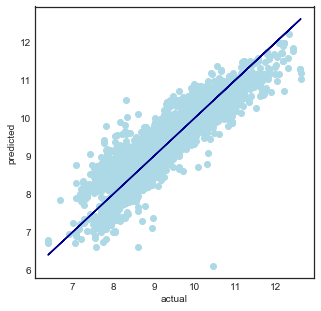

In [9]:
plt.rcParams['figure.figsize'] = 5,5
plt.scatter(y, pred, color='lightblue')
plt.plot(y, y, color='darkblue')
plt.xlabel('actual')
plt.ylabel('predicted')